# 題目：野村證券客戶資料分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## ❖ Onshore客戶分析

In [2]:
onshore_df = pd.read_excel("/Users/daphne/Desktop/Onshore_crm.xlsx")
onshore_df.head()

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,agentcode,agentname,institutioncode,institutionname,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID
0,2017-09-11,318281,1219218,林ＯＯ,P122******,1976-09-11,M,臺灣,個人(自然人),02XX853273,...,A0769,張Ｏ臻,D9000,多元理財部,A0769,張Ｏ臻,NaN,NaN,2017-09-12 10:40:09.837,FAB6BB5E-C5E0-4ED8-DC29-A98DB966CF82
1,2017-09-08,318270,1219207,劉ＯＯ,H124******,1997-06-13,M,臺灣,個人(自然人),NaN,...,A0431,陳Ｏ璇,D9000,多元理財部,A0431,陳Ｏ璇,NaN,NaN,2017-09-11 10:37:39.347,F8F2BB01-CAAF-3B5D-81C6-D0E2D86DC686
2,2017-09-08,318271,1219208,陳ＯＯ,E224******,1996-10-28,F,臺灣,個人(自然人),07XX83385,...,A0776,李Ｏ雯,D4130,高雄分公司,A0776,李Ｏ雯,NaN,NaN,2017-09-11 10:40:29.807,9038A160-3957-38F4-A423-D115D3AA4244
3,2017-09-08,318272,1219209,林ＯＯ,A223******,1975-10-08,F,臺灣,個人(自然人),NaN,...,A0278,黃Ｏ智,D4200,法人行銷台北一組,A0278,黃Ｏ智,NaN,NaN,2017-09-11 11:02:10.717,AE0436F1-1B6B-320E-E6F1-AF49929C8577
4,2017-09-08,318273,1219210,蔡ＯＯ,A227******,1986-03-27,F,臺灣,個人(自然人),NaN,...,A0769,張Ｏ臻,D9000,多元理財部,A0769,張Ｏ臻,NaN,NaN,2017-09-11 10:50:45.380,39EDA40D-C4A2-46FA-28CE-17D774C4A152


In [29]:
f = 0
m = 0
x = 0
for i in onshore_df['gendercode']:
    if i == 'F':
        f += 1
    elif i == "M":
        m += 1
    elif i == "X":
        x += 1

print(f)
print(m)
print(x)

55
39
6


### 1. 客戶的地區分佈

In [28]:
#將都市分入北、中、南、東四區
def which_area(city):
    city = city[:3]
    city_group = {'NORTH': ["台北市", "新北市", "基隆市", "新竹市", "桃園市", "新竹縣"], 'CENTER': ["台中市", "苗栗縣", "彰化縣", "南投縣", "雲林縣"],
                  'SOUTH': ["高雄市", "台南市", "嘉義市", "嘉義縣", "屏東縣", "澎湖縣"], 'EAST': ["宜蘭縣", "花蓮縣", "台東縣"]}

    for area in city_group:
        if city in city_group[area]:
            return area

        
#觀察客戶性別與居住地      
client_gen_area = []

for i in range(100):
    gen = onshore_df['gendercode'][i]
    area = which_area(onshore_df.address1_line1[i])
    #企業不計入
    if gen == 'X':
        continue
    client_set = [gen, area]
    client_gen_area.append(client_set)

#list內容示意
client_gen_area[:5]

[['M', 'NORTH'],
 ['M', 'NORTH'],
 ['F', 'SOUTH'],
 ['F', 'NORTH'],
 ['F', 'NORTH']]

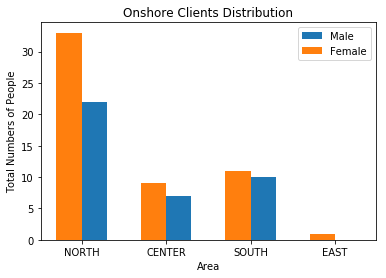

各區男性投保人數： [22, 7, 10, 0]
各區女性投保人數： [33, 9, 11, 1]


In [27]:
#計算每個地區的男女人數
area = ['NORTH', 'CENTER', 'SOUTH', 'EAST']
m_num = [0, 0, 0, 0]
f_num = [0, 0, 0, 0]

for clients in client_gen_area:
    try:
        i = area.index(clients[1])
        if clients[0] == 'M':
            m_num[i] += 1
        elif clients[0] == 'F':
            f_num[i] += 1
    except ValueError:
        continue

# 畫長條圖
plt.bar(area, m_num, label='Male', align='edge', width=0.3)
plt.bar(area, f_num, label='Female', align='edge', width=-0.3)
plt.legend()   #顯示label

plt.title('Onshore Clients Distribution')
plt.xlabel("Area")
plt.ylabel("Total Numbers of People")

plt.show()
print('各區男性投保人數：', m_num)
print('各區女性投保人數：', f_num)

保險人口主要集中北部，女生投保人數稍多於男生

### 2. 想了解年齡對投保是否有影響

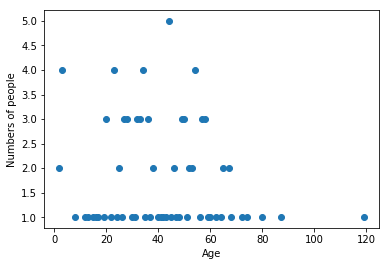

In [5]:
onshore_df['age'] = pd.to_datetime(onshore_df['birthdate'].astype(str), format = '%Y/%m/%d').apply(lambda x:datetime.datetime.today().year - x.year)
#print(type(onshore_df['age'][0]))

ages = dict()
for a in onshore_df['age']:
    age = a
    if age not in ages:
        ages[age] = 1
    else:
        ages[age] += 1

ages_sort = sorted(ages.items(), key=lambda a:a[0])
#print(ages_sort)  #dict：{'年齡'：人數}
#print(ages.keys())

x = [i[0] for i in ages_sort]
y = [j[1] for j in ages_sort]
plt.xlabel('Age')
plt.ylabel('Numbers of people')
plt.scatter(x, y)

可大約看出20-60歲的投保人數較高，人數最多的投保年齡約落在50歲。其他無明顯特徵。

### 3. 風險程度與保險人性別間的關係

{'5.0': [35, 45, 6], '4.0': [2, 7, 0], '2.0': [1, 2, 0]}


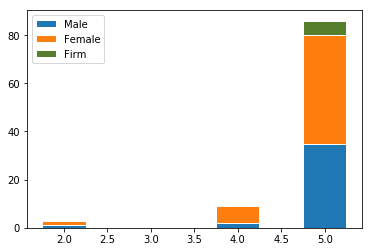

In [30]:
client_gen_risk = dict()

for i in range(100):
    gen = onshore_df['gendercode'][i]
    risk = str(onshore_df['assessmentrisk'][i])
    if risk != 'nan':
        if risk not in client_gen_risk:
            if gen == 'M':
                client_gen_risk[risk] = [1, 0, 0]
            elif gen == 'F':
                client_gen_risk[risk] = [0, 1, 0]
            elif gen == 'X':
                client_gen_risk[risk] = [0, 0, 1]

        else:
            if gen == 'M':
                 client_gen_risk[risk][0] += 1
            elif gen == 'F':
                 client_gen_risk[risk][1] += 1
            elif gen == 'X':
                 client_gen_risk[risk][2] += 1

print(client_gen_risk)   #{'risk':[M, F, Firm]}


risk_level = [float(i) for i in client_gen_risk.keys()]    #names
m_risk = [j[0] for j in client_gen_risk.values()]   #bars1
f_risk = [j[1] for j in client_gen_risk.values()]   #bars2
firm_risk = [j[2] for j in client_gen_risk.values()]   #bars3


#男女risk人數的和（height）
m_f_risk = np.add(m_risk, f_risk).tolist()


plt.bar(risk_level, m_risk, label='Male', edgecolor='white', width=0.5)
plt.bar(risk_level, f_risk, label='Female', bottom=m_risk, edgecolor='white', width=0.5)
plt.bar(risk_level, firm_risk, label='Firm', bottom=m_f_risk, color='#557f2d', edgecolor='white', width=0.5)


plt.legend()
plt.show()

透過長條堆積圖，可以觀察到客戶群大多風險程度為5。其中，企業投保人風險程度皆偏高。